# Etude de santé publique avec Python, Etablir un panorama de l’état de la malnutrition dans le monde en fonction de différente problématiques données.

## Importation des librairie : 
* PANDAS (bibliothèque du langage de programmation Python, permettant la manipulation et l'analyse des données. Elle propose en particulier des structures de données et des opérations de manipulation de tableaux numériques et de séries temporelles).
* NUMPY (bibliothèque du langage de programmation Python, destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux).
* MATPLOTLIB (bibliothèque du langage de programmation Python destinée à tracer et visualiser des données sous formes de graphiques).

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

*Importation des données :*

In [67]:
data_aide=pd.read_csv('/Users/user/Desktop/OPENCLASSROOM/MASTER 1 DATA ANALYST/Projet_4/Documents/DAN-P4-FAO/aide_alimentaire.csv')
data_dispo=pd.read_csv('/Users/user/Desktop/OPENCLASSROOM/MASTER 1 DATA ANALYST/Projet_4/Documents/DAN-P4-FAO/dispo_alimentaire.csv')
data_popu=pd.read_csv('/Users/user/Desktop/OPENCLASSROOM/MASTER 1 DATA ANALYST/Projet_4/Documents/DAN-P4-FAO/population.csv')
data_sous_nut=pd.read_csv('/Users/user/Desktop/OPENCLASSROOM/MASTER 1 DATA ANALYST/Projet_4/Documents/DAN-P4-FAO/sous_nutrition.csv')

In [68]:
data_sous_nut

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


In [69]:
data_popu

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


In [70]:
data_dispo

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [71]:
data_aide

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


*Vérification des valeurs nulles :*

In [72]:
data_aide.isnull().sum()

Pays bénéficiaire    0
Année                0
Produit              0
Valeur               0
dtype: int64

In [73]:
data_dispo.isnull().sum()

Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments pour animaux                                            12885
Autres Utilisations                                              10109
Disponibilité alimentaire (Kcal/personne/jour)                    1364
Disponibilité alimentaire en quantité (kg/personne/an)            1590
Disponibilité de matière grasse en quantité (g/personne/jour)     3811
Disponibilité de protéines en quantité (g/personne/jour)          4044
Disponibilité intérieure                                           223
Exportations - Quantité                                           3379
Importations - Quantité                                            753
Nourriture                                                        1590
Pertes                                                           11327
Produc

In [74]:
data_popu.isnull().sum()

Zone      0
Année     0
Valeur    0
dtype: int64

In [75]:
data_sous_nut.isnull().sum()

Zone        0
Année       0
Valeur    594
dtype: int64

*Re-controle d'une DATA :*

In [76]:
data_sous_nut

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


## Première intérrogation : la proportion de personnes en état de sous-nutrition pour l'année 2017 ?
Pour cela il nous faudra joindre deux jeux de données (data_sous_nut et data_popu).
Des modification de ces jeux de données est nécéssaire.

*Transformation des valeurs '2016-2018' en '2017' (Au vue des informations données dans le lexique de données) via la fonction **REPLACE** :*

In [77]:
data_sous_nut['Année'] = data_sous_nut['Année'].replace(['2016-2018'],['2017'])
data_sous_nut

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2017,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2017,NaN


*Création d'un filtre pour n'utiliser que les données 2017 :*

In [78]:
filtre_sous_nut_2017 = data_sous_nut['Année'] == '2017'
data_sous_nut_2017 = data_sous_nut[filtre_sous_nut_2017]
data_sous_nut_2017

,Zone,Année,Valeur
4,Afghanistan,2017,10.5
10,Afrique du Sud,2017,3.1
16,Albanie,2017,0.1
22,Algérie,2017,1.3
28,Allemagne,2017,NaN
...,...,...,...
1192,Venezuela (République bolivarienne du),2017,8
1198,Viet Nam,2017,6.5
1204,Yémen,2017,NaN
1210,Zambie,2017,NaN


In [79]:
filtre_popu_2017 = data_popu['Année'] == 2017
data_popu_2017 = data_popu[filtre_popu_2017]
data_popu_2017

,Zone,Année,Valeur
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402.484
1396,Viet Nam,2017,94600.648
1402,Yémen,2017,27834.819
1408,Zambie,2017,16853.599


*Jointure des deux jeux de données sur une nouvelle DATA (**df_prop_ssnut_2017**)via la fonction **MERGE**, cette jointure et faite en lien avec le champ 'Zone' qui est présent dans les deux jeux de données :* 

In [80]:
df_prop_ssnut_2017 = pd.merge(data_popu_2017, data_sous_nut_2017, how="right", left_on="Zone", right_on="Zone")
df_prop_ssnut_2017

,Zone,Année_x,Valeur_x,Année_y,Valeur_y
0,Afghanistan,2017,36296.113,2017,10.5
1,Afrique du Sud,2017,57009.756,2017,3.1
2,Albanie,2017,2884.169,2017,0.1
3,Algérie,2017,41389.189,2017,1.3
4,Allemagne,2017,82658.409,2017,NaN
...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,29402.484,2017,8
199,Viet Nam,2017,94600.648,2017,6.5
200,Yémen,2017,27834.819,2017,NaN
201,Zambie,2017,16853.599,2017,NaN


*Via la fonction **RENAME**, nous renomons les champs de façon plus appropriée :*

In [81]:
df_prop_ssnut_2017.rename(columns={'Année_x': 'Année_popu', 
                                   'Valeur_x': 'Valeur_popu',
                                   'Année_y': 'Année_ssnut',
                                   'Valeur_y': 'Valeur_ssnut'}, inplace=True)
df_prop_ssnut_2017

,Zone,Année_popu,Valeur_popu,Année_ssnut,Valeur_ssnut
0,Afghanistan,2017,36296.113,2017,10.5
1,Afrique du Sud,2017,57009.756,2017,3.1
2,Albanie,2017,2884.169,2017,0.1
3,Algérie,2017,41389.189,2017,1.3
4,Allemagne,2017,82658.409,2017,NaN
...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,29402.484,2017,8
199,Viet Nam,2017,94600.648,2017,6.5
200,Yémen,2017,27834.819,2017,NaN
201,Zambie,2017,16853.599,2017,NaN


*Nous constatons des doublons au niveau des champs 'Année'.
Nous utiliserons la fonction **DROP** pour supprimer un des deux champs non utile pour repondre a cette problématique :* 

In [82]:
df_prop_ssnut_2017.drop(columns = {'Année_popu'},inplace=True)
df_prop_ssnut_2017

,Zone,Valeur_popu,Année_ssnut,Valeur_ssnut
0,Afghanistan,36296.113,2017,10.5
1,Afrique du Sud,57009.756,2017,3.1
2,Albanie,2884.169,2017,0.1
3,Algérie,41389.189,2017,1.3
4,Allemagne,82658.409,2017,NaN
...,...,...,...,...
198,Venezuela (République bolivarienne du),29402.484,2017,8
199,Viet Nam,94600.648,2017,6.5
200,Yémen,27834.819,2017,NaN
201,Zambie,16853.599,2017,NaN


*Vérrification du type de nos données sur **df_prop_ssnut_2017** :* 

In [83]:
df_prop_ssnut_2017.dtypes

Zone             object
Valeur_popu     float64
Année_ssnut      object
Valeur_ssnut     object
dtype: object

*Pour la bonne utilisation de nos données il faut convertir le champ **'Valeur_ssnut'** en type float pour établir les calcules nécéssaire à notre problématiques (les types des deux champs **'valeur'** doivent étre identiques).*
* En premier lieu nous allons définir que les données <0.1 seront égale à 0 :

In [84]:
df_prop_ssnut_2017['Valeur_ssnut'] = df_prop_ssnut_2017['Valeur_ssnut'].replace(['<0.1'],['0'])
df_prop_ssnut_2017

,Zone,Valeur_popu,Année_ssnut,Valeur_ssnut
0,Afghanistan,36296.113,2017,10.5
1,Afrique du Sud,57009.756,2017,3.1
2,Albanie,2884.169,2017,0.1
3,Algérie,41389.189,2017,1.3
4,Allemagne,82658.409,2017,NaN
...,...,...,...,...
198,Venezuela (République bolivarienne du),29402.484,2017,8
199,Viet Nam,94600.648,2017,6.5
200,Yémen,27834.819,2017,NaN
201,Zambie,16853.599,2017,NaN


*Grace à la fonction **ASTYPE** nous transformons le type de donnée de **'Valeur_ssnut'** :*

In [85]:
df_prop_ssnut_2017['Valeur_ssnut'] = df_prop_ssnut_2017['Valeur_ssnut'].astype(float)
df_prop_ssnut_2017.dtypes

Zone             object
Valeur_popu     float64
Année_ssnut      object
Valeur_ssnut    float64
dtype: object

In [86]:
df_prop_ssnut_2017

,Zone,Valeur_popu,Année_ssnut,Valeur_ssnut
0,Afghanistan,36296.113,2017,10.5
1,Afrique du Sud,57009.756,2017,3.1
2,Albanie,2884.169,2017,0.1
3,Algérie,41389.189,2017,1.3
4,Allemagne,82658.409,2017,NaN
...,...,...,...,...
198,Venezuela (République bolivarienne du),29402.484,2017,8.0
199,Viet Nam,94600.648,2017,6.5
200,Yémen,27834.819,2017,NaN
201,Zambie,16853.599,2017,NaN


*Maintenant que les tyes de données corespondent, il faut armoniser l'échelle des Valeurs de population en million d'habitant (**'Valeur_popu' et 'Valeur_ssnut'**) :*

In [87]:
df_prop_ssnut_2017['Valeur_popu'] = df_prop_ssnut_2017['Valeur_popu']/1000
df_prop_ssnut_2017

,Zone,Valeur_popu,Année_ssnut,Valeur_ssnut
0,Afghanistan,36.296113,2017,10.5
1,Afrique du Sud,57.009756,2017,3.1
2,Albanie,2.884169,2017,0.1
3,Algérie,41.389189,2017,1.3
4,Allemagne,82.658409,2017,NaN
...,...,...,...,...
198,Venezuela (République bolivarienne du),29.402484,2017,8.0
199,Viet Nam,94.600648,2017,6.5
200,Yémen,27.834819,2017,NaN
201,Zambie,16.853599,2017,NaN


*Intégration d'un nouveau champ (**'Ratio_ssnut'**) pour voir le pourcentage du nombre d'habitant en sous nutrition par pays, via une division simple de **valeur_ssnut** par **valeur_popu** :* 

In [88]:
df_prop_ssnut_2017['Ratio_ssnut'] = df_prop_ssnut_2017['Valeur_ssnut']/df_prop_ssnut_2017['Valeur_popu']*100
df_prop_ssnut_2017

,Zone,Valeur_popu,Année_ssnut,Valeur_ssnut,Ratio_ssnut
0,Afghanistan,36.296113,2017,10.5,28.928718
1,Afrique du Sud,57.009756,2017,3.1,5.437666
2,Albanie,2.884169,2017,0.1,3.467203
3,Algérie,41.389189,2017,1.3,3.140917
4,Allemagne,82.658409,2017,NaN,NaN
...,...,...,...,...,...
198,Venezuela (République bolivarienne du),29.402484,2017,8.0,27.208586
199,Viet Nam,94.600648,2017,6.5,6.870989
200,Yémen,27.834819,2017,NaN,NaN
201,Zambie,16.853599,2017,NaN,NaN


*Calcule du ratio mondial :*

In [89]:
ratio = (df_prop_ssnut_2017['Valeur_ssnut'].sum()/df_prop_ssnut_2017['Valeur_popu'].sum())*100
ratio

7.1011968332354165

*Nous constatons donc que la proportion de personnes en état de sous-nutrition pour l'année 2017 est de **7,10%**.*

## Seconde intérrogation : Calculer le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire mondiale.

*Pour cela il faut commencer par créer une data frame de la disponibilité alimentaire comprenant la zone géographiques, ainsi que les disponibilités kcal par personne par jour.
Nous appliquons la fonction **GROUPBY** pour reunir toutes les données par zone et appliquons la fonction **SUM** pour afficher la somme de la disponibilité alimentaire.*

In [90]:
df_dispo_alim = data_dispo.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()
df_dispo_alim

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0
...,...,...
169,Émirats arabes unis,3275.0
170,Équateur,2346.0
171,États-Unis d'Amérique,3682.0
172,Éthiopie,2129.0


*Maintenant nous filtrons les data population par l'année souhaité (2017).*

In [91]:
filtre_data_popu_2017 = data_popu['Année'] == 2017
data_popu_2017 = data_popu[filtre_data_popu_2017]
data_popu_2017

,Zone,Année,Valeur
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402.484
1396,Viet Nam,2017,94600.648
1402,Yémen,2017,27834.819
1408,Zambie,2017,16853.599


*Convertion du champ Valeur en million d'habitant.*

In [92]:
data_popu_2017['Valeur'] = data_popu_2017['Valeur']/1000
data_popu_2017

/var/folders/fn/5_y1xsb152l905mlpsddq_t80000gn/T/ipykernel_737/4113260068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_popu_2017['Valeur'] = data_popu_2017['Valeur']/1000


,Zone,Année,Valeur
4,Afghanistan,2017,36.296113
10,Afrique du Sud,2017,57.009756
16,Albanie,2017,2.884169
22,Algérie,2017,41.389189
28,Allemagne,2017,82.658409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29.402484
1396,Viet Nam,2017,94.600648
1402,Yémen,2017,27.834819
1408,Zambie,2017,16.853599


*Application d'une jointure des deux data frame (modifier précédament) pour la création de notre data frame utiliser pour répondre à notre problématiques.*

In [93]:
df_dispo_alim_2017 = pd.merge(data_popu_2017, df_dispo_alim, how="right", left_on="Zone", right_on="Zone")
df_dispo_alim_2017

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017.0,36.296113,2087.0
1,Afrique du Sud,2017.0,57.009756,3020.0
2,Albanie,2017.0,2.884169,3188.0
3,Algérie,2017.0,41.389189,3293.0
4,Allemagne,2017.0,82.658409,3503.0
...,...,...,...,...
169,Émirats arabes unis,2017.0,9.487203,3275.0
170,Équateur,2017.0,16.785361,2346.0
171,États-Unis d'Amérique,2017.0,325.084756,3682.0
172,Éthiopie,2017.0,106.399924,2129.0


*Création d'un nouveau champ **'dispo_annuelle_popu'** permettant de visualiser les quantiters de nourriture disponible.*

In [94]:
df_dispo_alim_2017['dispo_annuelle_popu'] = df_dispo_alim_2017['Disponibilité alimentaire (Kcal/personne/jour)']*365*df_dispo_alim_2017['Valeur']
df_dispo_alim_2017

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour),dispo_annuelle_popu
0,Afghanistan,2017.0,36.296113,2087.0,2.764875e+07
1,Afrique du Sud,2017.0,57.009756,3020.0,6.284185e+07
2,Albanie,2017.0,2.884169,3188.0,3.356077e+06
3,Algérie,2017.0,41.389189,3293.0,4.974753e+07
4,Allemagne,2017.0,82.658409,3503.0,1.056866e+08
...,...,...,...,...,...
169,Émirats arabes unis,2017.0,9.487203,3275.0,1.134077e+07
170,Équateur,2017.0,16.785361,2346.0,1.437314e+07
171,États-Unis d'Amérique,2017.0,325.084756,3682.0,4.368912e+08
172,Éthiopie,2017.0,106.399924,2129.0,8.268178e+07


*Création d'un champ **'dispo_theoriques'** pour visualiser la quantiter de nourriture théorique dans l'hypothèse où l'ont ne consommerai que 2400 kcal/jour/personne.*

In [95]:
df_dispo_alim_2017['dispo_theoriques'] = 2400*365*df_dispo_alim_2017['Valeur']
df_dispo_alim_2017

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour),dispo_annuelle_popu,dispo_theoriques
0,Afghanistan,2017.0,36.296113,2087.0,2.764875e+07,3.179539e+07
1,Afrique du Sud,2017.0,57.009756,3020.0,6.284185e+07,4.994055e+07
2,Albanie,2017.0,2.884169,3188.0,3.356077e+06,2.526532e+06
3,Algérie,2017.0,41.389189,3293.0,4.974753e+07,3.625693e+07
4,Allemagne,2017.0,82.658409,3503.0,1.056866e+08,7.240877e+07
...,...,...,...,...,...,...
169,Émirats arabes unis,2017.0,9.487203,3275.0,1.134077e+07,8.310790e+06
170,Équateur,2017.0,16.785361,2346.0,1.437314e+07,1.470398e+07
171,États-Unis d'Amérique,2017.0,325.084756,3682.0,4.368912e+08,2.847742e+08
172,Éthiopie,2017.0,106.399924,2129.0,8.268178e+07,9.320633e+07


*Création d'un nouveau champ **'popu_nourie'** pour visualiser le nombre de personne nourrie par jour pour chaque pays (Application d'une règle de trois).*

In [96]:
df_dispo_alim_2017['popu_nourie'] = (df_dispo_alim_2017['Valeur'] * df_dispo_alim_2017['dispo_annuelle_popu'])/df_dispo_alim_2017['dispo_theoriques']
df_dispo_alim_2017

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour),dispo_annuelle_popu,dispo_theoriques,popu_nourie
0,Afghanistan,2017.0,36.296113,2087.0,2.764875e+07,3.179539e+07,31.562495
1,Afrique du Sud,2017.0,57.009756,3020.0,6.284185e+07,4.994055e+07,71.737276
2,Albanie,2017.0,2.884169,3188.0,3.356077e+06,2.526532e+06,3.831138
3,Algérie,2017.0,41.389189,3293.0,4.974753e+07,3.625693e+07,56.789416
4,Allemagne,2017.0,82.658409,3503.0,1.056866e+08,7.240877e+07,120.646836
...,...,...,...,...,...,...,...
169,Émirats arabes unis,2017.0,9.487203,3275.0,1.134077e+07,8.310790e+06,12.946079
170,Équateur,2017.0,16.785361,2346.0,1.437314e+07,1.470398e+07,16.407690
171,États-Unis d'Amérique,2017.0,325.084756,3682.0,4.368912e+08,2.847742e+08,498.734196
172,Éthiopie,2017.0,106.399924,2129.0,8.268178e+07,9.320633e+07,94.385599


*Pour terminer nous appliquons la fonction **SUM** pour calculer le nombre de personne que l'on peut nourrir avec la disponibilité alimentaire mondial en consomant 2400 kcal/jour ( ont multiplie ce chiffre par 1 millions pour avoir un résultat plus lisible)*

In [97]:
ratio2 = df_dispo_alim_2017['popu_nourie'].sum()*1000000
ratio2

8716243594.72125

*On constate, au vue de cette analyse, que nous aurions pu nourrir la totalité de la planete en 2017 (population mondial **7,509 milliards** d'habitant et nous pouvion nourrir **8,716 milliards** d'habitant.) 
Cela ammene a réfléchir sur l'utilisation de nos ressources.*

## Troisième intérrogation : Calculer le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire des produits végétaux.

*Pour répondre à cette intérogation nous appliquons la même méthodologie d'analyse que précédament, seule difference, nous appliquons un filtre pour ne travailler uniquement que sur les données d'origine végétale.*

In [98]:
filtre_data_dispo_vegetale = data_dispo['Origine'] == 'vegetale'
data_dispo_vegetale = data_dispo[filtre_data_dispo_vegetale]
data_dispo_vegetale

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15595,Îles Salomon,Sésame,vegetale,NaN,NaN,0.0,0.01,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15596,Îles Salomon,Thé,vegetale,NaN,NaN,0.0,0.17,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15597,Îles Salomon,Tomates,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [99]:
df_dispo_alim_vegetale = data_dispo_vegetale.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()
df_dispo_alim_vegetale

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,1871.0
1,Afrique du Sud,2533.0
2,Albanie,2203.0
3,Algérie,2915.0
4,Allemagne,2461.0
...,...,...
169,Émirats arabes unis,2718.0
170,Équateur,1732.0
171,États-Unis d'Amérique,2698.0
172,Éthiopie,2005.0


In [100]:
df_dispo_alim_vegetale_2017 = pd.merge(data_popu_2017, df_dispo_alim_vegetale, how="right", left_on="Zone", right_on="Zone")
df_dispo_alim_vegetale_2017

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017.0,36.296113,1871.0
1,Afrique du Sud,2017.0,57.009756,2533.0
2,Albanie,2017.0,2.884169,2203.0
3,Algérie,2017.0,41.389189,2915.0
4,Allemagne,2017.0,82.658409,2461.0
...,...,...,...,...
169,Émirats arabes unis,2017.0,9.487203,2718.0
170,Équateur,2017.0,16.785361,1732.0
171,États-Unis d'Amérique,2017.0,325.084756,2698.0
172,Éthiopie,2017.0,106.399924,2005.0


In [101]:
df_dispo_alim_vegetale_2017['dispo_annuelle_vegetale__popu'] = df_dispo_alim_vegetale_2017['Disponibilité alimentaire (Kcal/personne/jour)']*365*df_dispo_alim_vegetale_2017['Valeur']
df_dispo_alim_vegetale_2017

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour),dispo_annuelle_vegetale__popu
0,Afghanistan,2017.0,36.296113,1871.0,2.478716e+07
1,Afrique du Sud,2017.0,57.009756,2533.0,5.270808e+07
2,Albanie,2017.0,2.884169,2203.0,2.319146e+06
3,Algérie,2017.0,41.389189,2915.0,4.403706e+07
4,Allemagne,2017.0,82.658409,2461.0,7.424916e+07
...,...,...,...,...,...
169,Émirats arabes unis,2017.0,9.487203,2718.0,9.411969e+06
170,Équateur,2017.0,16.785361,1732.0,1.061137e+07
171,États-Unis d'Amérique,2017.0,325.084756,2698.0,3.201337e+08
172,Éthiopie,2017.0,106.399924,2005.0,7.786612e+07


In [102]:
df_dispo_alim_vegetale_2017['dispo_theoriques_vegetale'] = 2400*365*df_dispo_alim_vegetale_2017['Valeur']
df_dispo_alim_vegetale_2017

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour),dispo_annuelle_vegetale__popu,dispo_theoriques_vegetale
0,Afghanistan,2017.0,36.296113,1871.0,2.478716e+07,3.179539e+07
1,Afrique du Sud,2017.0,57.009756,2533.0,5.270808e+07,4.994055e+07
2,Albanie,2017.0,2.884169,2203.0,2.319146e+06,2.526532e+06
3,Algérie,2017.0,41.389189,2915.0,4.403706e+07,3.625693e+07
4,Allemagne,2017.0,82.658409,2461.0,7.424916e+07,7.240877e+07
...,...,...,...,...,...,...
169,Émirats arabes unis,2017.0,9.487203,2718.0,9.411969e+06,8.310790e+06
170,Équateur,2017.0,16.785361,1732.0,1.061137e+07,1.470398e+07
171,États-Unis d'Amérique,2017.0,325.084756,2698.0,3.201337e+08,2.847742e+08
172,Éthiopie,2017.0,106.399924,2005.0,7.786612e+07,9.320633e+07


In [103]:
df_dispo_alim_vegetale_2017['popu_nourie'] = (df_dispo_alim_vegetale_2017['Valeur'] * df_dispo_alim_vegetale_2017['dispo_annuelle_vegetale__popu'])/df_dispo_alim_vegetale_2017['dispo_theoriques_vegetale']
df_dispo_alim_vegetale_2017

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour),dispo_annuelle_vegetale__popu,dispo_theoriques_vegetale,popu_nourie
0,Afghanistan,2017.0,36.296113,1871.0,2.478716e+07,3.179539e+07,28.295845
1,Afrique du Sud,2017.0,57.009756,2533.0,5.270808e+07,4.994055e+07,60.169047
2,Albanie,2017.0,2.884169,2203.0,2.319146e+06,2.526532e+06,2.647427
3,Algérie,2017.0,41.389189,2915.0,4.403706e+07,3.625693e+07,50.270619
4,Allemagne,2017.0,82.658409,2461.0,7.424916e+07,7.240877e+07,84.759310
...,...,...,...,...,...,...,...
169,Émirats arabes unis,2017.0,9.487203,2718.0,9.411969e+06,8.310790e+06,10.744257
170,Équateur,2017.0,16.785361,1732.0,1.061137e+07,1.470398e+07,12.113436
171,États-Unis d'Amérique,2017.0,325.084756,2698.0,3.201337e+08,2.847742e+08,365.449447
172,Éthiopie,2017.0,106.399924,2005.0,7.786612e+07,9.320633e+07,88.888270


In [104]:
ratio3 = df_dispo_alim_vegetale_2017['popu_nourie'].sum()*1000000
ratio3

7191985088.125417

*On constate, au vue de cette analyse, que la quasi-totalité de la planete en 2017 aurait pu être nourrie seulement avec de la nouriture végétale.(population mondial **7,509 milliards** d'habitant et nous pouvion nourrir **7,191 milliards** d'habitant.)*

## Quatrième intérrogation : Calculer l’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine.

*Pour répondre à cette intérrogation, nous allons partir du tableau **data_dispo** :*

In [105]:
data_dispo

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


* Premièrement nous caculons la somme de la disponibilité intèrieur total

In [106]:
dispo_int_total = data_dispo['Disponibilité intérieure'].sum()
dispo_int_total

9848994.0

* Ensuite nous calculons la part alimentaire de chaques requete ( animal, pertes et humain) 
que nous division part la disponibilité totale : 

In [107]:
dispo_part_animale = data_dispo['Aliments pour animaux'].sum() / dispo_int_total
dispo_part_animale

0.13242418464261427

In [108]:
dispo_pertes = data_dispo['Pertes'].sum() / dispo_int_total
dispo_pertes

0.04606541541196999

In [109]:
dispo_part_humaine = data_dispo['Nourriture'].sum() / dispo_int_total
dispo_part_humaine

0.4951021393657058

*Nous calculons la part restante :*

In [110]:
dispo_part_autres = (dispo_int_total - (dispo_part_animale + dispo_pertes + dispo_part_humaine)) / dispo_int_total
dispo_part_autres

0.9999999316080669

*Maintenant grace à la bibliotèque **MATPLOTLIB** nous créeons une **PieChart** pour représenter le pourcentage et la répartition de chaque part :*

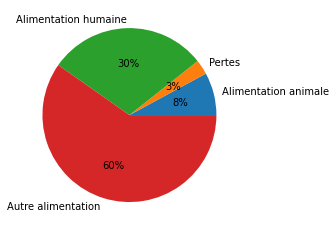

In [111]:
data = [dispo_part_animale,dispo_pertes,dispo_part_humaine,dispo_part_autres]
labels = ['Alimentation animale','Pertes','Alimentation humaine','Autre alimentation']
plt.pie(data,labels = labels,autopct = '%0.f%%')
plt.show()

## Cinquième intérrogation :  Quelle sont les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017.
*Pour répondre à cela nous utiliserons la data frame **df_prop_ssnut_2017** (créer précédament pour répondre à l'intérrogation numéro 1) :*

In [112]:
df_prop_ssnut_2017

,Zone,Valeur_popu,Année_ssnut,Valeur_ssnut,Ratio_ssnut
0,Afghanistan,36.296113,2017,10.5,28.928718
1,Afrique du Sud,57.009756,2017,3.1,5.437666
2,Albanie,2.884169,2017,0.1,3.467203
3,Algérie,41.389189,2017,1.3,3.140917
4,Allemagne,82.658409,2017,NaN,NaN
...,...,...,...,...,...
198,Venezuela (République bolivarienne du),29.402484,2017,8.0,27.208586
199,Viet Nam,94.600648,2017,6.5,6.870989
200,Yémen,27.834819,2017,NaN,NaN
201,Zambie,16.853599,2017,NaN,NaN


*Pour cela nous feront la somme du **ration_ssnut** et nous grouperons le tout par 'Zone' 
et les classerons de façons décroissante en un top 10.*

In [113]:
df_pays_ssnut_max = df_prop_ssnut_2017['Ratio_ssnut'].groupby(by = df_prop_ssnut_2017['Zone']).sum().sort_values(ascending = False).head(10).reset_index()
df_pays_ssnut_max

,Zone,Ratio_ssnut
0,Haïti,48.259182
1,République populaire démocratique de Corée,47.188685
2,Madagascar,41.062924
3,Libéria,38.279742
4,Lesotho,38.249438
5,Tchad,37.957606
6,Rwanda,35.055619
7,Mozambique,32.810898
8,Timor-Leste,32.173531
9,Afghanistan,28.928718


## Sixième intérrogation : Quelles sont les pays qui ont le plus bénéficié d’aide depuis 2013.
*les données **aide alimentaire** nous seront nécéssaire.*

In [114]:
data_aide

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


*Il nous faut apliquer un filtre sur le champs **'Années'** pour n'afficher que les données supèrieur ou égale a 2013 :*

In [115]:
filtre_aide_sup_2013 = data_aide['Année'] >= 2013
data_aide_sup_2013 = data_aide[filtre_aide_sup_2013]
data_aide_sup_2013

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


*Pour terminer nous faisont la sommes du champs **'Valeur'** et regroupons le tout en fonction des pays bénificère d'aides en un classement par ordre décroissant et un top 10 :*

In [116]:
df_data_aide_sup_2013 = data_aide_sup_2013['Valeur'].groupby(by = data_aide_sup_2013['Pays bénéficiaire']).sum().sort_values(ascending = False).head(10).reset_index()
df_data_aide_sup_2013

,Pays bénéficiaire,Valeur
0,République arabe syrienne,1858943
1,Éthiopie,1381294
2,Yémen,1206484
3,Soudan du Sud,695248
4,Soudan,669784
5,Kenya,552836
6,Bangladesh,348188
7,Somalie,292678
8,République démocratique du Congo,288502
9,Niger,276344


## Septième intérrogation : Quelle sont les pays ayant le plus/le moins de disponibilité/habitant.
*Pour cela il nous faut utiliser les donnée de **disponibilité alimentaire** :*

In [117]:
data_dispo

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


*Nous faisont la sommes du champs **'Disponibilité alimentaire (Kcal/personne/jour)'** et regroupons le tout en fonction des pays **('Zone')** en un classement par ordre décroissant en un top 10 (la condition **ascending = false**, nous donne ceux avec le plus de disponibilité).
Cela nous donne le classement des pays qui bénificie du plus de disponibilité alimentaire par habitant.*

In [118]:
df_data_dispo_max = data_dispo['Disponibilité alimentaire (Kcal/personne/jour)'].groupby(by = data_dispo['Zone']).sum().sort_values(ascending = False).head(10).reset_index()
df_data_dispo_max

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Autriche,3770.0
1,Belgique,3737.0
2,Turquie,3708.0
3,États-Unis d'Amérique,3682.0
4,Israël,3610.0
5,Irlande,3602.0
6,Italie,3578.0
7,Luxembourg,3540.0
8,Égypte,3518.0
9,Allemagne,3503.0


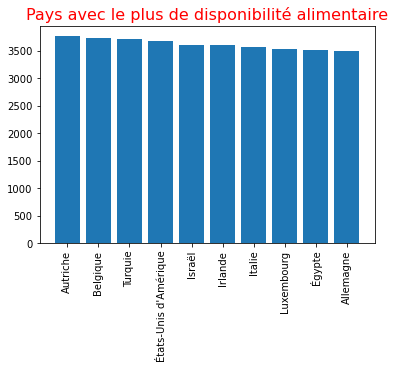

In [119]:
height = (df_data_dispo_max['Disponibilité alimentaire (Kcal/personne/jour)'])
bars = (df_data_dispo_max['Zone'])
x_pos = np.arange(len(bars))
plt.bar(x_pos, height)
plt.xticks(x_pos, bars, color = 'black', rotation=90)
plt.yticks(color = 'black')
plt.title('Pays avec le plus de disponibilité alimentaire', color ='red', fontsize = 16)
plt.show()

*Nous faisont la sommes du champs **'Disponibilité alimentaire (Kcal/personne/jour)'** et regroupons le tout en fonction des pays **('Zone')** en les classement par ordre décroissant en un top 10(la condition **ascending = True**, nous donne ceux avec le moin de disponibilité).
Cela nous donne le classement des pays qui bénificie du moins de disponibilité alimentaire par habitant.*

In [120]:
df_data_dispo_min = data_dispo['Disponibilité alimentaire (Kcal/personne/jour)'].groupby(by = data_dispo['Zone']).sum().sort_values(ascending = True).head(10).reset_index()
df_data_dispo_min

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,République centrafricaine,1879.0
1,Zambie,1924.0
2,Madagascar,2056.0
3,Afghanistan,2087.0
4,Haïti,2089.0
5,République populaire démocratique de Corée,2093.0
6,Tchad,2109.0
7,Zimbabwe,2113.0
8,Ouganda,2126.0
9,Timor-Leste,2129.0


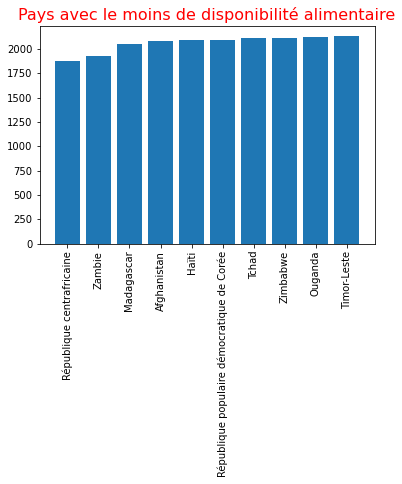

In [121]:
height = (df_data_dispo_min['Disponibilité alimentaire (Kcal/personne/jour)'])
bars = (df_data_dispo_min['Zone'])
x_pos = np.arange(len(bars))
plt.bar(x_pos, height)
plt.xticks(x_pos, bars, color = 'Black',rotation=90)
plt.yticks(color = 'black')
plt.title('Pays avec le moins de disponibilité alimentaire', color ='red', fontsize = 16)
plt.show()

*Pour terminer cette analyse nous allons tenter de répondre à deux dernières intérrogations laissez en suspend par **Julien** dans le lexiques des données.*

## Huitème intérrogation : Quelle est la répartition entre l’alimentation humaine et l’alimentation pour animaux aux niveau des céréale.

*Pour répondre à cette intérrogation il nous tout d'abors définir quelle sont les céréales. Pour cela il faut ce référer au site donné dans le lexique de données : **http://www.fao.org/faostat/fr/#data**.
Après recherche les céréales sont : **Avoine, Blé, Céréales, Maïs, Orge, Riz, Seigle et le Sésame**.
Ensuite nous utiliserons les données de **disponibilité alimentaire**.*

In [122]:
data_dispo

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


*Création d'une variable **'cereale'** permetant de ciblé les céréale souhaitées :*

In [123]:
cereale = ['Avoine','Blé et produits','Céréales, Autres','Maïs et produits','Orge et produits','Riz (Eq Blanchi)','Seigle','Sésame']
cereale

['Avoine',
 'Blé et produits',
 'Céréales, Autres',
 'Maïs et produits',
 'Orge et produits',
 'Riz (Eq Blanchi)',
 'Seigle',
 'Sésame']

*Application de la fonction **isin** sur notre tableau **data_dispo** :*

In [124]:
data_dispo_cereale = data_dispo[data_dispo['Produit'].isin(cereale)]
data_dispo_cereale

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
12,Afghanistan,"Céréales, Autres",vegetale,NaN,NaN,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
47,Afghanistan,Riz (Eq Blanchi),vegetale,NaN,NaN,141.0,13.82,0.27,2.70,461.0,NaN,119.0,422.0,24.0,342.0,14.0,NaN,NaN
51,Afghanistan,Sésame,vegetale,NaN,NaN,9.0,0.52,0.77,0.27,21.0,11.0,NaN,16.0,1.0,32.0,1.0,4.0,0.0
67,Afrique du Sud,Avoine,vegetale,8.0,NaN,5.0,0.75,0.09,0.16,49.0,4.0,25.0,40.0,1.0,28.0,1.0,NaN,0.0
81,Afrique du Sud,"Céréales, Autres",vegetale,8.0,NaN,1.0,0.07,0.00,0.02,12.0,10.0,3.0,4.0,0.0,19.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15511,Éthiopie,Seigle,vegetale,NaN,NaN,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15517,Éthiopie,Sésame,vegetale,NaN,NaN,2.0,0.11,0.15,0.05,12.0,175.0,0.0,10.0,NaN,187.0,2.0,NaN,0.0
15545,Îles Salomon,"Céréales, Autres",vegetale,NaN,NaN,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
15591,Îles Salomon,Riz (Eq Blanchi),vegetale,0.0,12.0,623.0,63.76,1.36,10.90,49.0,0.0,47.0,36.0,1.0,3.0,0.0,NaN,0.0


*Création de la data frame pour repondre à l'intérrogation :* 

In [125]:
df_data_dispo_cereale = data_dispo.groupby('Zone')['Produit','Aliments pour animaux','Nourriture'].sum().reset_index()
df_data_dispo_cereale

/var/folders/fn/5_y1xsb152l905mlpsddq_t80000gn/T/ipykernel_737/3825553772.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_data_dispo_cereale = data_dispo.groupby('Zone')['Produit','Aliments pour animaux','Nourriture'].sum().reset_index()


,Zone,Aliments pour animaux,Nourriture
0,Afghanistan,768.0,10735.0
1,Afrique du Sud,5309.0,29812.0
2,Albanie,660.0,3476.0
3,Algérie,4352.0,31729.0
4,Allemagne,30209.0,79238.0
...,...,...,...
169,Émirats arabes unis,1174.0,6548.0
170,Équateur,1200.0,8574.0
171,États-Unis d'Amérique,148432.0,320889.0
172,Éthiopie,685.0,33361.0


*Cette analyse nous as permis de constater que les cereales sont surtout utilisées pour **l'alimentation humaine**.*

## Dernière intérrogation : L'utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition en fonction de l’exportation par rapport à la production.

*Création de la variable **'Manioc'** :*

In [126]:
manioc = ['Manioc']
manioc

['Manioc']

*Application de la fonction **isin** pour ne garder que le manioc.*

In [127]:
data_dispo_manioc = data_dispo[data_dispo['Produit'].isin(manioc)]
data_dispo_manioc

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
110,Afrique du Sud,Manioc,vegetale,NaN,57.0,0.0,0.00,0.00,0.00,57.0,2.0,58.0,0.0,NaN,NaN,NaN,NaN,1.0
203,Albanie,Manioc,vegetale,NaN,0.0,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
295,Algérie,Manioc,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
390,Allemagne,Manioc,vegetale,1.0,26.0,NaN,NaN,NaN,NaN,27.0,14.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN
475,Angola,Manioc,vegetale,8880.0,NaN,560.0,197.90,0.60,4.72,16412.0,0.0,0.0,4249.0,3282.0,16412.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15108,Égypte,Manioc,vegetale,0.0,0.0,0.0,0.00,NaN,0.00,-1.0,3.0,1.0,0.0,NaN,NaN,NaN,NaN,0.0
15201,Émirats arabes unis,Manioc,vegetale,NaN,7.0,3.0,1.47,0.01,0.03,20.0,1.0,21.0,14.0,NaN,NaN,NaN,NaN,NaN
15294,Équateur,Manioc,vegetale,0.0,1.0,6.0,2.53,0.02,0.05,44.0,8.0,6.0,40.0,2.0,46.0,NaN,NaN,0.0
15390,États-Unis d'Amérique,Manioc,vegetale,288.0,245.0,0.0,0.14,0.00,0.00,579.0,9.0,588.0,46.0,NaN,NaN,NaN,NaN,NaN


*Crétion d'un filtre en fonction de la **Zone (Thailande)**.*

In [128]:
filtre_dispo_manioc_thailande = data_dispo_manioc['Zone'] == 'Thaïlande'
data_dispo_manioc_thailande = data_dispo_manioc[filtre_dispo_manioc_thailande]
data_dispo_manioc_thailande

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


*Création d'un nouveau tableau en appliquant une jointure avec les données de **sous nutrition** :*

In [129]:
df_manioc_ssnut_thailande = pd.merge(data_dispo_manioc_thailande, data_sous_nut, how="inner", left_on="Zone", right_on="Zone")
df_manioc_ssnut_thailande

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur
0,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0,2012-2014,6.2
1,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0,2013-2015,6
2,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0,2014-2016,5.9
3,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0,2015-2017,6
4,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0,2017,6.2
5,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0,2017-2019,6.5


*Calcule de la proportion de **manioc exporter** en division la somme des exportation par la somme de la production :*

In [130]:
Proportion_manioc = df_manioc_ssnut_thailande['Exportations - Quantité'].sum()/df_manioc_ssnut_thailande['Production'].sum()
Proportion_manioc

0.8341272991928014

*Nous constatons que la Thailande exporte plus de **83%** de son manioc malgrer le nombre de personne en sous nutrition.*